In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import time
import constraints
from ants import Ants
from grid import Grid

In [5]:
SEED = 0
NUM_ANTS = int(1e5)
MAX_STEPS = 100
MAX_ITER = 100
GRID_HEIGHT = 11
GRID_WIDTH = 11
WAIT_TIME = 1

In [6]:
# store the function that crates the boundaries
constraints = constraints.Constraint(constraints.square)

In [7]:
def tracking(num_ants, constraints, max_steps=1, grid_height=10, grid_width=10, wait_time:int=None, show_animation:bool=True, seed=0):
    
    # set initial seed
    np.random.seed(seed)

    ants = Ants(num_ants)
    grid = Grid(grid_height, grid_width)
    start_change = pd.Series(data = [num_ants], index=[(0,0)])
    grid.update_grid(changes=start_change)
    grid.initialize_mask(constraints=constraints)

    starttime = time.time()


    while ants.step<=max_steps and ants.num_alive>0:
        clear_output(wait=True)
        ants.move(constraints)
        grid.update_grid(changes=ants.summarize_positions())
        if show_animation:
            text = '{}\t{}\n{}\t{}\n{}\t{}\n{}\t{}'.format(
                'Steps:', ants.step, 
                'Alive:', ants.num_alive, 
                'Alive%:', ants.perc_alive, 
                'Deaths now:', ants.death_history[ants.step]
                ).expandtabs()
            grid.plot(vmax=num_ants, masked=True, text=text)
        #if ants.step%1==0 or ants.step>max_steps or ants.num_alive<=0:
        print(f'step\talive\talive%\tdeath_now')
        print(f'{ants.step}\t{ants.num_alive}\t{ants.perc_alive}\t{ants.death_history[ants.step]}')

        if wait_time:
            time.sleep(wait_time - ((time.time() - starttime) % wait_time))

    death_history = pd.DataFrame.from_dict(ants.death_history, orient='index', columns=['num'])
    death_history.index.name = 'step'
    death_history.sort_index(inplace=True)


    return death_history, ants, grid

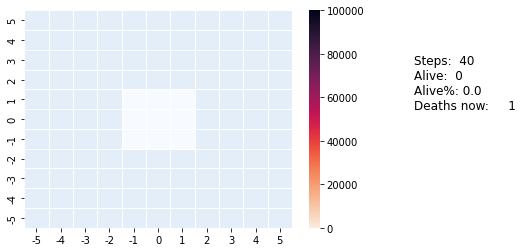

step	alive	alive%	death_now
40	0	0.0	1


In [9]:
death_history, ants, grid = tracking(
    num_ants=NUM_ANTS,
    constraints = constraints,
    max_steps=MAX_STEPS, 
    grid_height=GRID_HEIGHT, 
    grid_width=GRID_WIDTH, 
    wait_time=WAIT_TIME, 
    seed=SEED
    )

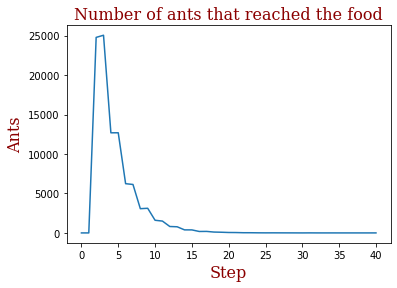

In [12]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.plot(death_history)
plt.title('Number of ants that reached the food', fontdict=font)

plt.xlabel('Step', fontdict=font)
plt.ylabel('Ants', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [19]:
((death_history/NUM_ANTS).num*(death_history/NUM_ANTS).index)
death_history.reset_index().apply(np.prod, axis=1).sum()/NUM_ANTS

7e-05

In [20]:
grid.mask

x,-5,-4,-3,-2,-1,0,1,2,3,4,5
y,,,,,,,,,,,
5,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,False,False,True,True,True,True
3,True,True,True,True,False,False,False,False,True,True,True
2,True,True,True,False,False,False,False,False,True,True,True
1,True,True,True,False,False,False,False,False,False,True,True
0,True,True,True,False,False,False,False,False,False,True,True
-1,True,True,True,False,False,False,False,False,False,True,True
-2,True,True,True,False,False,False,False,False,True,True,True
-3,True,True,True,True,False,False,False,True,True,True,True


In [21]:
mask = pd.DataFrame(index = pd.MultiIndex.from_product([grid.index, grid.columns]))
mask.index.set_names(['y', 'x'], inplace=True)
# evaluate the constraint function in each point
mask['mask'] = mask.reset_index().apply(lambda pos: constraints(pos['x'], pos['y']), axis=1).values
mask = mask[mask['mask'].values]
mask

mask
y  x       
 4  0  True
    1  True
 3 -1  True
    0  True
    1  True
    2  True
 2 -2  True
   -1  True
    0  True
    1  True
    2  True
 1 -2  True
   -1  True
    0  True
    1  True
    2  True
    3  True
 0 -2  True
   -1  True
    0  True
    1  True
    2  True
    3  True
-1 -2  True
   -1  True
    0  True
    1  True
    2  True
    3  True
-2 -2  True
   -1  True
    0  True
    1  True
    2  True
-3 -1  True
    0  True
    1  True

In [22]:
M = pd.DataFrame(data = 0., index = list(mask.index), columns = list(mask.index))
M

,"(4, 0)","(4, 1)","(3, -1)","(3, 0)","(3, 1)","(3, 2)","(2, -2)","(2, -1)","(2, 0)","(2, 1)",...,"(-1, 2)","(-1, 3)","(-2, -2)","(-2, -1)","(-2, 0)","(-2, 1)","(-2, 2)","(-3, -1)","(-3, 0)","(-3, 1)"
"(4, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(4, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, -2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def neighbors(x, y):
    return {(x+1, y), (x-1, y), (x, y+1), (x, y-1)}

M = pd.DataFrame(data = 0., index = list(mask.index), columns = list(mask.index))

for x,y in M.index:
    #M.at[(x, y), (x+1, y)] = 0.25 if (x+1,y) in M.columns else 0
    #M.at[(x, y), (x-1, y)] = 0.25 if (x-1,y) in M.columns else 0
    #M.at[(x, y), (x, y+1)] = 0.25 if (x,y+1) in M.columns else 0
    #M.at[(x, y), (x, y-1)] = 0.25 if (x,y-1) in M.columns else 0
    n = neighbors(x, y)
    n = n.intersection(set(M.columns))
    for neighbor in n:
        M.at[(x, y), neighbor] = 0.25
#         print((x, y), (x+1, y))
#         M.at[(x, y), (x+1, y)] = 0.25
M

,"(4, 0)","(4, 1)","(3, -1)","(3, 0)","(3, 1)","(3, 2)","(2, -2)","(2, -1)","(2, 0)","(2, 1)",...,"(-1, 2)","(-1, 3)","(-2, -2)","(-2, -1)","(-2, 0)","(-2, 1)","(-2, 2)","(-3, -1)","(-3, 0)","(-3, 1)"
"(4, 0)",0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(4, 1)",0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(3, -1)",0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(3, 0)",0.25,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(3, 1)",0.00,0.25,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(3, 2)",0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(2, -2)",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(2, -1)",0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(2, 0)",0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(2, 1)",0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [24]:
np.linalg.det(1-M)

-3.9151826807991344e-54

In [25]:

np.linalg.inv(1-M)


array([[ 1.95399252e-14, -4.00000000e+00, -8.28571429e+00, ...,
        -1.71428571e+00, -4.00000000e+00,  2.30926389e-14],
       [-4.00000000e+00, -3.24819536e-14, -1.02857143e+01, ...,
        -1.37142857e+01,  2.84217094e-14, -4.00000000e+00],
       [-8.08937807e+00,  2.45630993e+01,  1.02939420e+16, ...,
         1.02939420e+16, -1.44761581e+01, -1.26746669e+01],
       ...,
       [ 2.25118602e+01, -3.40201171e+01, -1.12589991e+16, ...,
        -2.02661983e+16,  2.42916171e+01,  2.15330836e+01],
       [-4.00000000e+00, -1.04430226e-14, -4.57142857e+00, ...,
        -4.57142857e+00,  7.83226695e-15, -4.00000000e+00],
       [-9.47570191e-15, -4.00000000e+00,  4.74107143e+00, ...,
         4.99107143e+00, -4.00000000e+00, -8.04728104e-15]])

In [26]:
pd.DataFrame(np.linalg.pinv(1-M), index = M.index, columns = M.columns).at[(0,0), (0,0)]

-5.887720690339249

In [27]:
constraints

<function __main__.ellipse(x, y)>

In [90]:
def find_neighbors(x, y):
    return {(x+1, y), (x-1, y), (x, y+1), (x, y-1)}

inside_points = {(0,0)}
points_to_explore = {(0,0)}
bondary_points = set()
MAX_POINTS = 100

n = 0

while len(points_to_explore)!=0 and n<MAX_POINTS:
    if n%10 == 0:
        print(n, end='\t')
    n+=1
    # select a point to explore and analyze its neighbours
    point = points_to_explore.pop()
    neighbors = find_neighbors(*point)
    new_inside = {neighbor for neighbor in neighbors \
        if ((neighbor not in inside_points) and constraints(*neighbor))}
    new_bondary = {neighbor for neighbor in (neighbors-new_inside) \
        if  not constraints(*neighbor)}
    # add the good neighbours in the inside_points and points_to_explore
    inside_points |= new_inside
    points_to_explore |= new_inside
    bondary_points |= new_bondary


    

    
    


0	10	20	30	

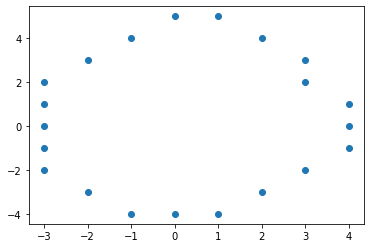

In [89]:
x, y = np.array(list(bondary_points)).T
plt.scatter(x, y)

In [80]:
np.array(list(bondary_points))

array([[ 4,  0],
       [ 3, -1],
       [ 3, -2],
       [ 3,  1],
       [-3,  0],
       [ 0, -4],
       [ 0,  2],
       [ 1, -3],
       [ 0,  5],
       [ 2,  2],
       [ 1,  0],
       [ 1,  3],
       [-1, -1],
       [-1, -2],
       [-2, -1],
       [-2, -2],
       [-1,  1],
       [-2,  1],
       [-1,  4],
       [ 3,  0],
       [ 3,  3],
       [-3,  2],
       [ 0, -1],
       [ 0, -2],
       [ 0,  1],
       [ 2, -1],
       [ 2, -2],
       [ 1,  2],
       [ 1, -4],
       [ 2,  1],
       [ 2,  4],
       [ 0,  4],
       [ 1,  5],
       [-2, -3],
       [-1, -3],
       [-1,  0],
       [-2,  0],
       [-1,  3],
       [-2,  3],
       [ 4, -1],
       [ 3,  2],
       [-2,  2],
       [ 4,  1],
       [-3, -1],
       [ 0, -3],
       [-3, -2],
       [-3,  1],
       [ 0,  0],
       [ 2, -3],
       [ 1,  1],
       [ 0,  3],
       [ 2,  0],
       [ 1, -2],
       [ 1, -1],
       [ 1,  4],
       [ 2,  3],
       [-1, -4],
       [-1,  2]])

In [67]:
inside_points - set(mask.index)
m = {(y,x) for x,y in inside_points}

In [69]:
m - set(mask.index)
set(mask.index) - m

set()